In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

xs = sp.random.randn(40000, 2)
ys = sp.cos(10*sp.hypot(xs[:, 0], xs[:, 1]))*sp.exp(-(xs[:, 0]**2 + xs[:, 1]**2))

In [44]:
import math

def ini(x):
    bound = math.sqrt(2)*math.sqrt(3.0)/math.sqrt(x.data.size(0))
    return x.data.uniform_(-bound, bound)


class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        s = 5
        self.fc1 = nn.Linear(2, s)
        self.fc2 = nn.Linear(s, s)
        self.fc3 = nn.Linear(s, s)
        self.fc4 = nn.Linear(s, s)
        self.fc5 = nn.Linear(s, s)
        self.fc6 = nn.Linear(s, s)
        self.fc7 = nn.Linear(s, s)
        self.fc8 = nn.Linear(s, 1)
        init = ini
        init(self.fc1.weight)
        init(self.fc2.weight)
        init(self.fc3.weight)
        init(self.fc4.weight)
        init(self.fc5.weight)
        init(self.fc6.weight)
        init(self.fc7.weight)
        init(self.fc8.weight)
        self.fc1.bias.data.fill_(0)
        self.fc2.bias.data.fill_(0)
        self.fc3.bias.data.fill_(0)
        self.fc4.bias.data.fill_(0)
        self.fc5.bias.data.fill_(0)
        self.fc6.bias.data.fill_(0)
        self.fc7.bias.data.fill_(0)
        self.fc8.bias.data.fill_(0)
    
    def forward(self, x):
        ac = F.relu
        #ac = F.tanh
        #ac = F.softsign
        #ac = lambda x: torch.sign(x)*torch.log1p(torch.abs(x))
        x = ac(self.fc1(x))
        x = ac(self.fc2(x))
        x = ac(self.fc3(x))
        x = ac(self.fc4(x))
        x = ac(self.fc5(x))
        x = ac(self.fc6(x))
        x = ac(self.fc7(x))
        x = self.fc8(x)
        return x


net = Net()
net

inp = Variable(torch.Tensor(sp.reshape(xs, (len(xs), -1))))
out = net(inp)
loss = nn.MSELoss()(out, Variable(torch.Tensor(ys)))

#net.zero_grad()
#out.backward(torch.randn(10000, 1))


import torch.optim as optim


optimizer = optim.Adam(net.parameters(), lr=0.001)

ds = torch.utils.data.TensorDataset(torch.Tensor(sp.reshape(xs, (len(xs), -1))), torch.Tensor(sp.reshape(ys, (len(ys), -1))))
dl = torch.utils.data.DataLoader(ds, batch_size=500, shuffle=True, num_workers=1)

import itertools

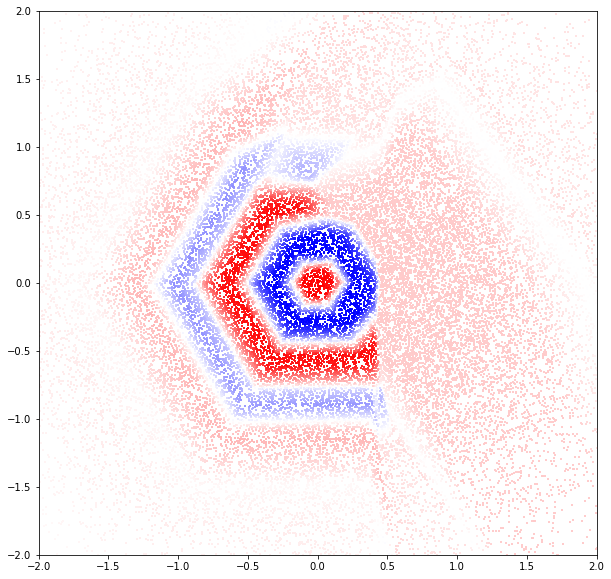

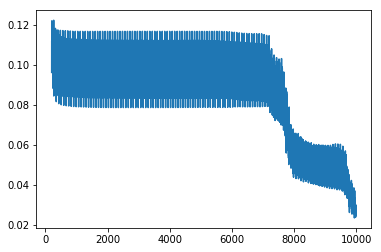

In [45]:
it = itertools.cycle(dl)
ns = []
ls = []
for n in range(10000):
    x, y = next(it)
    optimizer.zero_grad()
    out = net(Variable(x))
    loss = nn.MSELoss()(out, Variable(y))
    ns.append(n)
    ls.append(loss.data[0])
    loss.backward()
    optimizer.step()

tt = net(inp).data.numpy()

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs[:, 0], xs[:, 1], c=tt, s=1, marker=",", cmap="bwr")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
#ax.plot(xs, tt, linestyle="--")
#ax.plot(xs, ys);
from IPython.display import display
#display(fig)
fig, ax = plt.subplots()
ax.plot(ns[200:], ls[200:]);
#display(fig)

(-2, 2)

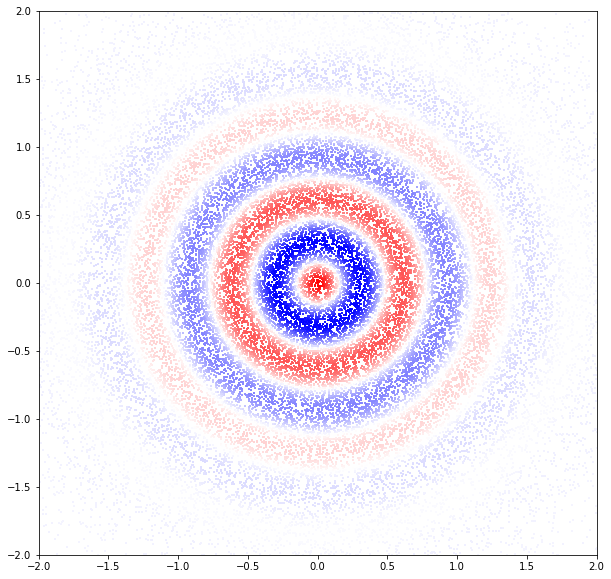

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs[:, 0], xs[:, 1], c=ys, s=1, marker=",", cmap="bwr")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

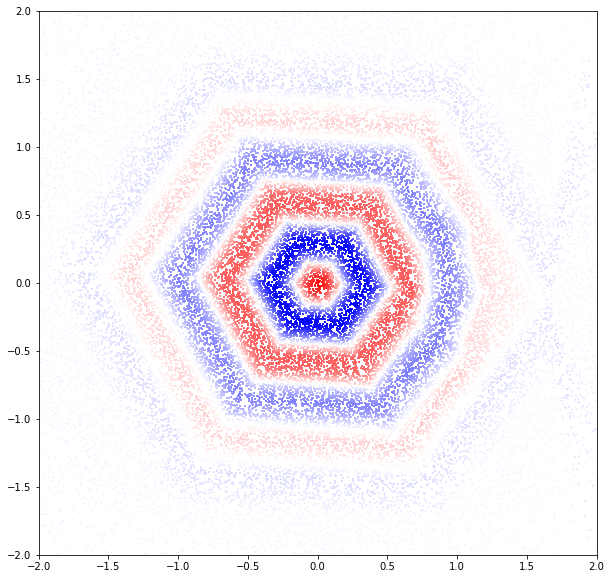

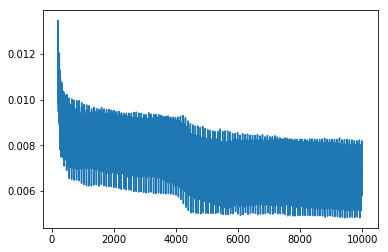

In [46]:
it = itertools.cycle(dl)
ns = []
ls = []
for n in range(10000):
    x, y = next(it)
    optimizer.zero_grad()
    out = net(Variable(x))
    loss = nn.MSELoss()(out, Variable(y))
    ns.append(n)
    ls.append(loss.data[0])
    loss.backward()
    optimizer.step()

tt = net(inp).data.numpy()

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs[:, 0], xs[:, 1], c=tt, s=1, marker=",", cmap="bwr")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
#ax.plot(xs, tt, linestyle="--")
#ax.plot(xs, ys);
from IPython.display import display
#display(fig)
fig, ax = plt.subplots()
ax.plot(ns[200:], ls[200:]);
#display(fig)

In [47]:
net

Net (
  (fc1): Linear (2 -> 5)
  (fc2): Linear (5 -> 5)
  (fc3): Linear (5 -> 5)
  (fc4): Linear (5 -> 5)
  (fc5): Linear (5 -> 5)
  (fc6): Linear (5 -> 5)
  (fc7): Linear (5 -> 5)
  (fc8): Linear (5 -> 1)
)

In [48]:
net.state_dict()

OrderedDict([('fc1.weight', 
               1.0185 -0.0522
              -0.0576 -0.9800
               0.4837 -0.0043
              -0.6421  0.4176
               0.5880  0.2983
              [torch.FloatTensor of size 5x2]), ('fc1.bias', 
              -0.6389
              -0.0052
              -0.8030
               0.0014
               0.0017
              [torch.FloatTensor of size 5]), ('fc2.weight', 
               0.0320 -0.7350  1.1254 -0.9106 -1.0440
              -0.1618 -0.9934 -0.7831 -0.3447  0.3475
               0.6521  0.7135 -1.9326  0.8955  1.0278
               0.9008  0.1813  1.9676  0.2251  0.2498
               0.4868 -0.4259  0.7883  0.0295 -0.5126
              [torch.FloatTensor of size 5x5]), ('fc2.bias', 
               0.2027
              -0.5258
              -0.1925
               0.0456
              -0.0579
              [torch.FloatTensor of size 5]), ('fc3.weight', 
               0.5514 -0.5914  0.8511 -1.0415 -0.6498
               0.3605  0.0386